In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nhanes/RHQ_I.XPT
/kaggle/input/nhanes/DEMO_I.XPT
/kaggle/input/nhanes/TST_I.XPT
/kaggle/input/nhanes/MCQ_J.XPT



The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The NHANES Sex Steroid Hormone and Reproductive Health data is a subset of the NHANES data that focuses on the reproductive health of adults.

The data includes measurements of sex steroid hormones such as testosterone, estradiol, and sex hormone binding globulin, as well as information on reproductive health outcomes such as menstrual cycles, fertility, and contraceptive use. The dataset is based on a sample of non-pregnant women aged 20-39 and men aged 20-59.

In addition to hormone levels and reproductive health outcomes, the dataset includes demographic information such as age, race/ethnicity, and education level, as well as behavioral information such as smoking status and physical activity level.****

First, we will import the files from NHANES. Here is a video walkthrough: https://www.youtube.com/watch?v=qgWkrv7AYxI

In [2]:
df_Demographic =  pd.read_sas('/kaggle/input/nhanes/DEMO_I.XPT') #You can download the files and get more information here: https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Demographics&Cycle=2015-2016

df_Sex_Steroid_Hormone = pd.read_sas('/kaggle/input/nhanes/TST_I.XPT') #You can download the files and get more information here: https://wwwn.cdc.gov/Nchs/Nhanes/Search/DataPage.aspx?Component=Laboratory&Cycle=2015-2016

df_Reproductive_Health = pd.read_sas('/kaggle/input/nhanes/RHQ_I.XPT') #You can download the files and get more information here: https://wwwn.cdc.gov/Nchs/Nhanes/Search/DataPage.aspx?Component=Questionnaire&Cycle=2017-2018

Next, we will rename the columns to make the data easily readable. 

In [3]:
df_Demographic = df_Demographic.rename(columns = {'SEQN':'Respondent sequence number', 
'SDDSRVYR':'Data release cycle', 
'RIDSTATR':'Interview/Examination status', 
'RIAGENDR':'Gender', 
'RIDAGEYR':'Age in years at screening', 
'RIDAGEMN':'Age in months at screening', 
'RIDRETH1':'Race/Hispanic origin', 
'RIDRETH3':'Race/Hispanic origin w/ NH Asian', 
'RIDEXMON':'Six month time period', 
'RIDEXAGM':'Age in months at exam', 
'DMQMILIZ':'Served active duty in US Armed Forces', 
'DMQADFC':'Served in a foreign country', 
'DMDBORN4':'Country of birth', 
'DMDCITZN':'Citizenship status', 
'DMDYRSUS':'Length of time in US', 
'DMDEDUC3':'Education level', 
'DMDEDUC2':'Education level', 
'DMDMARTL':'Marital status', 
'RIDEXPRG':'Pregnancy status at exam', 
'SIALANG':'Language of SP Interview', 
'SIAPROXY':'Proxy used in SP Interview?', 
'SIAINTRP':'Interpreter used in SP Interview?', 
'FIALANG':'Language of Family Interview', 
'FIAPROXY':'Proxy used in Family Interview?', 
'FIAINTRP':'Interpreter used in Family Interview?', 
'MIALANG':'Language of MEC Interview', 
'MIAPROXY':'Proxy used in MEC Interview?', 
'MIAINTRP':'Interpreter used in MEC Interview?', 
'AIALANGA':'Language of ACASI Interview', 
'DMDHHSIZ':'Total number of people in the Household', 
'DMDFMSIZ':'Total number of people in the Family', 
'DMDHHSZA':'# of children 5 years or younger in HH', 
'DMDHHSZB':'# of children 6-17 years old in HH', 
'DMDHHSZE':'# of adults 60 years or older in HH', 
'DMDHRGND':"HH ref person's gender", 
'DMDHRAGE':"HH ref person's age in years", 
'DMDHRBR4':"HH ref person's country of birth", 
'DMDHREDU':"HH ref person's education level", 
'DMDHRMAR':"HH ref person's marital status", 
'DMDHSEDU':"HH ref person's spouse's education level", 
'WTINT2YR':'Full sample 2 year interview weight', 
'WTMEC2YR':'Full sample 2 year MEC exam weight', 
'SDMVPSU':'Masked variance pseudo-PSU', 
'SDMVSTRA':'Masked variance pseudo-stratum', 
'INDHHIN2':'Annual household income', 
'INDFMIN2':'Annual family income', 
'INDFMPIR':'Ratio of family income to poverty'})

In [4]:
df_Sex_Steroid_Hormone = df_Sex_Steroid_Hormone.rename(columns ={'SEQN':'Respondent sequence number',
'LBXTST':'Testosterone, total (ng/dL)',
'LBDTSTLC':'Testosterone comment code',
'LBXEST': 'Estradiol (pg/mL)',
'LBDESTLC': 'Estradiol Comment Code',
'LBXSHBG': 'SHBG (nmol/L)', 
'LBDSHGLC': 'SHBG Comment Code'})

In [5]:
df_Reproductive_Health = df_Reproductive_Health.rename(columns = {'SEQN':'Respondent sequence number', 
'RHQ010':'Age when first menstrual period occurred', 
'RHD018':'Estimated age in months at menarche', 
'RHQ020':'Age range at first menstrual period', 
'RHQ031':'Had regular periods in past 12 months', 
'RHD043':'Reason not having regular periods', 
'RHQ060':'Age at last menstrual period', 
'RHQ070':'Age range at last menstrual period', 
'RHQ074':'Tried for a year to become pregnant?', 
'RHQ076':'Seen a DR b/c unable to become pregnant?', 
'RHQ078':'Ever treated for a pelvic infection/PID?', 
'RHQ131':'Ever been pregnant?', 
'RHD143':'Are you pregnant now?', 
'RHQ160':'How many times have been pregnant?', 
'RHQ162':'During pregnancy, told you have diabetes', 
'RHQ163':'Age told you had diabetes while pregnant', 
'RHQ166':'How many vaginal deliveries?', 
'RHQ169':'How many cesarean deliveries?', 
'RHQ172':'Any babies weigh 9 lbs or more?', 
'RHD173':'Age when delivered baby 9 lbs or more?', 
'RHQ171':'How many deliveries live birth result?', 
'RHD180':'Age at first live birth', 
'RHD190':'Age at last live birth', 
'RHQ197':'How many months ago have baby?', 
'RHQ200':'Now breastfeeding a child?', 
'RHD280':'Had a hysterectomy?', 
'RHQ291':'Age when had hysterectomy', 
'RHQ305':'Had both ovaries removed?', 
'RHQ332':'Age when both ovaries removed', 
'RHQ420':'Ever taken birth control pills?', 
'RHQ540':'Ever use female hormones?', 
'RHQ542A':'Hormone pills used', 
'RHQ542B':'Hormone patches used', 
'RHQ542C':'Hormone cream/suppository/injection used', 
'RHQ542D':'Other form of female hormone used', 
'RHQ554':'Use hormone pills w/estrogen only', 
'RHQ560Q':'How long taking estrogen-only pills?', 
'RHQ560U':'Unit of measure: months, years', 
'RHQ570':'Used estrogen/progestin combo pills', 
'RHQ576Q':'How long taking estrogen/progestin?', 
'RHQ576U':'Unit of measure: months, years', 
'RHQ580':'Used estrogen-only patches?', 
'RHQ586Q':'How long using estrogen only patches?', 
'RHQ586U':'Unit of measure: months, years', 
'RHQ596':'Used estrogen/progestin combo patches?', 
'RHQ602Q':'How long use estrogen/progestin patch', 
'RHQ602U':'Unit of measure: months, years'})

Next, we will create useful dataframes to use later in our analysis. 

First we will get the age of females who have responded to the survey.

In [6]:
df_Demographic = df_Demographic[['Respondent sequence number','Gender','Age in years at screening']]
Female_demographics = df_Demographic.loc[df_Demographic['Gender'] == 2]

Female_demographics

,Respondent sequence number,Gender,Age in years at screening
3,83735.0,2.0,56.0
4,83736.0,2.0,42.0
5,83737.0,2.0,72.0
6,83738.0,2.0,11.0
10,83742.0,2.0,32.0
...,...,...,...
9957,93689.0,2.0,69.0
9963,93695.0,2.0,76.0
9965,93697.0,2.0,80.0
9967,93699.0,2.0,6.0


Next, we will find those who have answered yes to the question: Seen a DR b/c unable to become pregnant?

In [7]:
infertile = df_Reproductive_Health[['Respondent sequence number','Seen a DR b/c unable to become pregnant?']].loc[df_Reproductive_Health['Seen a DR b/c unable to become pregnant?'] == 1]
infertile_females = infertile.merge(Female_demographics, on = 'Respondent sequence number')
infertile_females

,Respondent sequence number,Seen a DR b/c unable to become pregnant?,Gender,Age in years at screening
0,84033.0,1.0,2.0,41.0
1,84088.0,1.0,2.0,45.0
2,84217.0,1.0,2.0,59.0
3,84308.0,1.0,2.0,41.0
4,84363.0,1.0,2.0,36.0
...,...,...,...,...
130,93429.0,1.0,2.0,26.0
131,93436.0,1.0,2.0,52.0
132,93508.0,1.0,2.0,53.0
133,93531.0,1.0,2.0,52.0


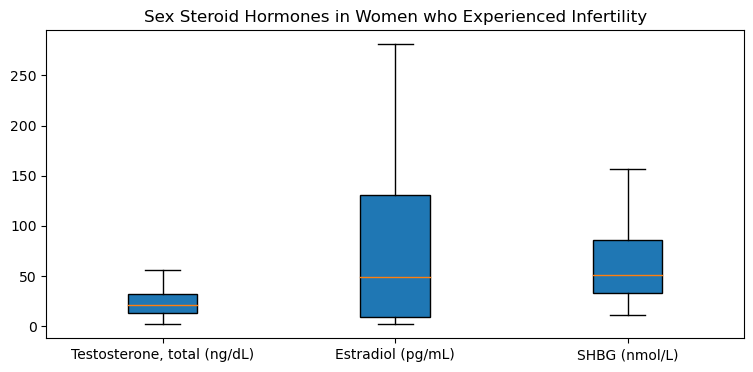

In [8]:
import matplotlib.pyplot as plt

data = df_Sex_Steroid_Hormone.loc[df_Sex_Steroid_Hormone['Respondent sequence number'].isin(infertile_females['Respondent sequence number'])].dropna().iloc[:, [1,3,5]]
labels = data.columns

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

# rectangular box plot
bplot1 = ax.boxplot(data,
                     patch_artist=True, 
                     labels=labels, showfliers=False) #showfliers removes outliers from the plot

ax.set_title('Sex Steroid Hormones in Women who Experienced Infertility')

#plt.xticks(rotation=45, ha='right') #This is optional to rotate the x-labels

plt.show()

In [9]:
data.describe()

,"Testosterone, total (ng/dL)",Estradiol (pg/mL),SHBG (nmol/L)
count,123.000000,123.000000,123.000000
mean,30.979106,121.110959,76.673415
std,41.745509,316.519938,73.786658
min,1.900000,2.114000,11.350000
25%,13.000000,8.685000,32.785000
50%,21.300000,49.500000,50.760000
75%,32.150000,130.500000,86.070000
max,272.000000,2780.000000,566.300000


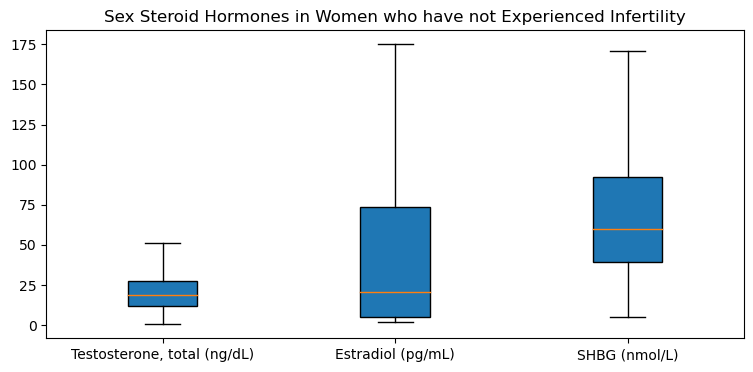

In [10]:
data = df_Sex_Steroid_Hormone.loc[df_Sex_Steroid_Hormone['Respondent sequence number'].isin(Female_demographics['Respondent sequence number'])].dropna().iloc[:, [1,3,5]]
labels = data.columns
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

# rectangular box plot
bplot1 = ax.boxplot(data,
                     patch_artist=True,  # fill with color
                     labels=labels, showfliers=False)  # will be used to label x-ticks, showfliers removes outliers from the plot

ax.set_title('Sex Steroid Hormones in Women who have not Experienced Infertility')

#plt.xticks(rotation=45, ha='right') #This is optional to rotate the x-labels

plt.show()

In [11]:
data.describe()

,"Testosterone, total (ng/dL)",Estradiol (pg/mL),SHBG (nmol/L)
count,3517.000000,3517.000000,3517.000000
mean,22.264913,114.761977,75.374723
std,21.636354,750.509762,59.033941
min,0.530000,2.114000,4.810000
25%,11.800000,5.070000,39.620000
50%,18.700000,20.900000,60.080000
75%,27.500000,73.400000,92.020000
max,444.000000,14000.000000,758.200000


In [12]:
plt_data = df_Sex_Steroid_Hormone.merge(Female_demographics, on = 'Respondent sequence number')
plt_data

,Respondent sequence number,"Testosterone, total (ng/dL)",Testosterone comment code,Estradiol (pg/mL),Estradiol Comment Code,SHBG (nmol/L),SHBG Comment Code,Gender,Age in years at screening
0,83735.0,41.00,5.397605e-79,22.300,5.397605e-79,62.77,5.397605e-79,2.0,56.0
1,83736.0,21.80,5.397605e-79,2.114,1.000000e+00,NaN,NaN,2.0,42.0
2,83737.0,5.55,5.397605e-79,2.114,1.000000e+00,55.08,5.397605e-79,2.0,72.0
3,83738.0,19.50,5.397605e-79,25.600,5.397605e-79,26.08,5.397605e-79,2.0,11.0
4,83742.0,30.70,5.397605e-79,64.500,5.397605e-79,35.50,5.397605e-79,2.0,32.0
...,...,...,...,...,...,...,...,...,...
4110,93689.0,17.40,5.397605e-79,4.020,5.397605e-79,74.28,5.397605e-79,2.0,69.0
4111,93695.0,22.10,5.397605e-79,2.114,1.000000e+00,65.03,5.397605e-79,2.0,76.0
4112,93697.0,31.20,5.397605e-79,4.840,5.397605e-79,109.80,5.397605e-79,2.0,80.0
4113,93699.0,4.56,5.397605e-79,2.114,1.000000e+00,59.45,5.397605e-79,2.0,6.0


In [13]:
'''import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

x = plt_data['Age in years at screening']
y = plt_data['Estradiol (pg/mL)']

sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set()#ylim=(0, 250))

plt.show()'''

"import matplotlib.pyplot as plt\nimport numpy as np\n\nplt.style.use('_mpl-gallery')\n\nx = plt_data['Age in years at screening']\ny = plt_data['Estradiol (pg/mL)']\n\nsizes = np.random.uniform(15, 80, len(x))\ncolors = np.random.uniform(15, 80, len(x))\n\nfig, ax = plt.subplots()\n\nax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)\n\nax.set()#ylim=(0, 250))\n\nplt.show()"

In [14]:
plt_data_infertility = plt_data.loc[plt_data['Respondent sequence number'].isin(infertile_females['Respondent sequence number'])].dropna()


In [15]:
'''plt.style.use('_mpl-gallery')

x = plt_data_infertility['Age in years at screening']
y = plt_data_infertility['Estradiol (pg/mL)']

sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set()#ylim=(0, 250))

plt.show()'''

"plt.style.use('_mpl-gallery')\n\nx = plt_data_infertility['Age in years at screening']\ny = plt_data_infertility['Estradiol (pg/mL)']\n\nsizes = np.random.uniform(15, 80, len(x))\ncolors = np.random.uniform(15, 80, len(x))\n\nfig, ax = plt.subplots()\n\nax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)\n\nax.set()#ylim=(0, 250))\n\nplt.show()"

In [16]:
plt_data = df_Sex_Steroid_Hormone.merge(Female_demographics, on = 'Respondent sequence number').merge(df_Reproductive_Health[['Respondent sequence number','Seen a DR b/c unable to become pregnant?']], on = 'Respondent sequence number' )

plt_data

,Respondent sequence number,"Testosterone, total (ng/dL)",Testosterone comment code,Estradiol (pg/mL),Estradiol Comment Code,SHBG (nmol/L),SHBG Comment Code,Gender,Age in years at screening,Seen a DR b/c unable to become pregnant?
0,83735.0,41.00,5.397605e-79,22.300,5.397605e-79,62.77,5.397605e-79,2.0,56.0,2.0
1,83736.0,21.80,5.397605e-79,2.114,1.000000e+00,NaN,NaN,2.0,42.0,2.0
2,83737.0,5.55,5.397605e-79,2.114,1.000000e+00,55.08,5.397605e-79,2.0,72.0,NaN
3,83742.0,30.70,5.397605e-79,64.500,5.397605e-79,35.50,5.397605e-79,2.0,32.0,2.0
4,83745.0,27.10,5.397605e-79,24.800,5.397605e-79,42.73,5.397605e-79,2.0,15.0,NaN
...,...,...,...,...,...,...,...,...,...,...
3466,93687.0,16.70,5.397605e-79,54.200,5.397605e-79,179.00,5.397605e-79,2.0,16.0,NaN
3467,93689.0,17.40,5.397605e-79,4.020,5.397605e-79,74.28,5.397605e-79,2.0,69.0,NaN
3468,93695.0,22.10,5.397605e-79,2.114,1.000000e+00,65.03,5.397605e-79,2.0,76.0,NaN
3469,93697.0,31.20,5.397605e-79,4.840,5.397605e-79,109.80,5.397605e-79,2.0,80.0,NaN


In [17]:
plt_data.describe()

,Respondent sequence number,"Testosterone, total (ng/dL)",Testosterone comment code,Estradiol (pg/mL),Estradiol Comment Code,SHBG (nmol/L),SHBG Comment Code,Gender,Age in years at screening,Seen a DR b/c unable to become pregnant?
count,3471.000000,3197.000000,3.197000e+03,3156.000000,3.156000e+03,3108.000000,3.108000e+03,3471.0,3471.000000,1794.000000
mean,88688.928551,24.949515,9.383797e-04,131.311283,1.083650e-01,77.415592,5.397605e-79,2.0,43.044656,1.924749
std,2879.217899,25.151863,3.062340e-02,820.950368,3.108901e-01,74.349444,0.000000e+00,0.0,20.569612,0.263869
min,83735.000000,0.530000,5.397605e-79,2.114000,5.397605e-79,4.810000,5.397605e-79,2.0,12.000000,1.000000
25%,86155.500000,13.900000,5.397605e-79,6.480000,5.397605e-79,38.700000,5.397605e-79,2.0,25.000000,2.000000
50%,88680.000000,20.300000,5.397605e-79,26.600000,5.397605e-79,58.595000,5.397605e-79,2.0,42.000000,2.000000
75%,91130.500000,29.100000,5.397605e-79,86.500000,5.397605e-79,89.417500,5.397605e-79,2.0,60.000000,2.000000
max,93702.000000,583.000000,1.000000e+00,14000.000000,1.000000e+00,1031.000000,5.397605e-79,2.0,80.000000,2.000000


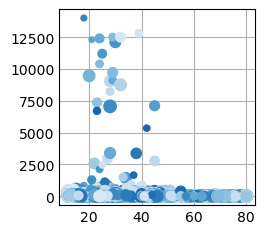

In [18]:
plt.style.use('_mpl-gallery')

x = plt_data['Age in years at screening']
y = plt_data['Estradiol (pg/mL)']

sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set()#ylim=(0, 250))

plt.show()

In [19]:
bins = [0, 17, 25, 35, 45, 55, 200]
labels = ['17 and under', '18-25', '26-35', '36-45', '46-55', '56+']
plt_data['Age in years at screening'] = pd.cut(x = plt_data['Age in years at screening'].astype(int), bins = bins, labels = labels)
plt_data

,Respondent sequence number,"Testosterone, total (ng/dL)",Testosterone comment code,Estradiol (pg/mL),Estradiol Comment Code,SHBG (nmol/L),SHBG Comment Code,Gender,Age in years at screening,Seen a DR b/c unable to become pregnant?
0,83735.0,41.00,5.397605e-79,22.300,5.397605e-79,62.77,5.397605e-79,2.0,56+,2.0
1,83736.0,21.80,5.397605e-79,2.114,1.000000e+00,NaN,NaN,2.0,36-45,2.0
2,83737.0,5.55,5.397605e-79,2.114,1.000000e+00,55.08,5.397605e-79,2.0,56+,NaN
3,83742.0,30.70,5.397605e-79,64.500,5.397605e-79,35.50,5.397605e-79,2.0,26-35,2.0
4,83745.0,27.10,5.397605e-79,24.800,5.397605e-79,42.73,5.397605e-79,2.0,17 and under,NaN
...,...,...,...,...,...,...,...,...,...,...
3466,93687.0,16.70,5.397605e-79,54.200,5.397605e-79,179.00,5.397605e-79,2.0,17 and under,NaN
3467,93689.0,17.40,5.397605e-79,4.020,5.397605e-79,74.28,5.397605e-79,2.0,56+,NaN
3468,93695.0,22.10,5.397605e-79,2.114,1.000000e+00,65.03,5.397605e-79,2.0,56+,NaN
3469,93697.0,31.20,5.397605e-79,4.840,5.397605e-79,109.80,5.397605e-79,2.0,56+,NaN


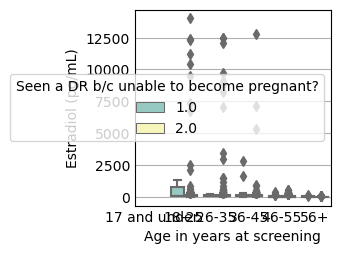

In [20]:
import seaborn as sns
#sns.set_style("whitegrid")
ax = sns.boxplot(x=plt_data['Age in years at screening'], y=plt_data['Estradiol (pg/mL)'], hue=plt_data['Seen a DR b/c unable to become pregnant?'],              
data=plt_data, palette="Set3")

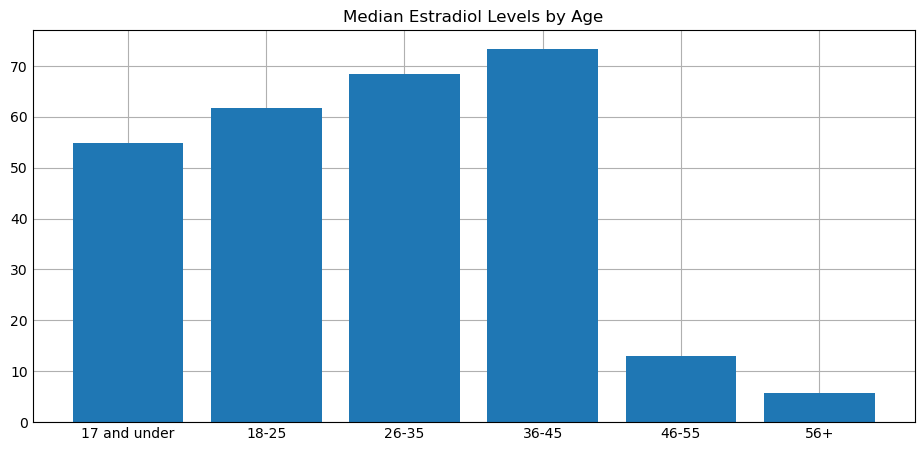

In [21]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('_mpl-gallery')

estradiol = plt_data.groupby(by='Age in years at screening').median()['Estradiol (pg/mL)']

x = list(estradiol.index.values)
y = plt_data.groupby(by='Age in years at screening').median()['Estradiol (pg/mL)']

# plot
fig, ax = plt.subplots(figsize=(9, 4))

ax.bar(x, y)

ax.set()
ax.set_title('Median Estradiol Levels by Age')

plt.show()

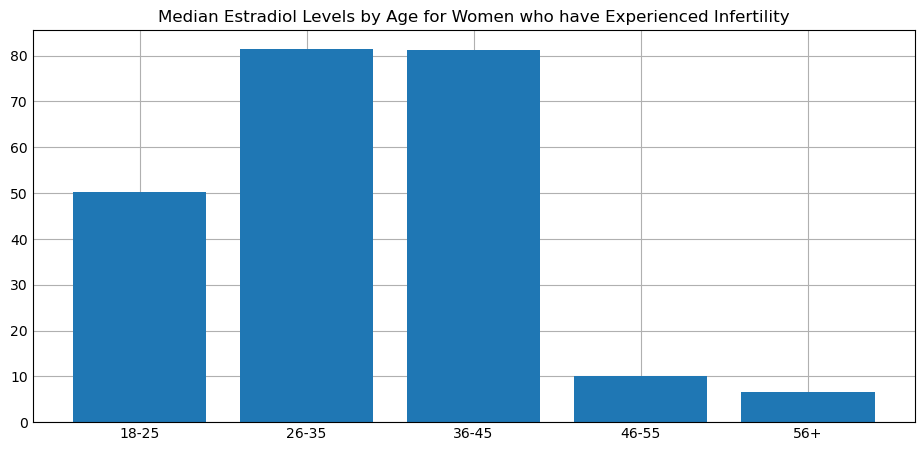

In [22]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('_mpl-gallery')

plt_data = plt_data.loc[plt_data['Seen a DR b/c unable to become pregnant?'] == 1]

estradiol = plt_data.groupby(by='Age in years at screening').median()['Estradiol (pg/mL)']

x = list(estradiol.index.values)
y = plt_data.groupby(by='Age in years at screening').median()['Estradiol (pg/mL)']

# plot
fig, ax = plt.subplots(figsize=(9, 4))

ax.bar(x, y)

ax.set()
ax.set_title('Median Estradiol Levels by Age for Women who have Experienced Infertility')

plt.show()